# BEES3041: Modelling the photosynthetic response to environmental conditions

![](data/logo.jpeg)

# Introduction

In this lab we are going to explore the C~3~ leaf-level photosynthesis model proposed by @Far80 and use this to simulate photosynthesis at leaf, ecosystem and global scales. The model is central to all land schemes embedded in coupled-climate models and predicts that photosynthesis is limited by the slowest of three biochemical processes: 

  1. The maximum rate of Rubisco-catalysed carboxylation
  2. The rate of ribulose 1,5-bisphosphate (RuBP) regeneration via electron transport 
  3. The rate of RuBP regeneration via triose phosphate utilisation 

In this practical we are only going to consider the first two limitations. There a number of great papers which cover this subject in detail, see for example, @Ber13, @Med02 and @Sha85.

We are going to use the photosynthesis model to:

* learn how leaf-level photosynthesis responds to changes in the environmental forcing (photosynthetically active radiation, temperature and carbon dioxide).
* simulate GPP at the ecosystem-scale (~1 km^2) using FLUXNET (eddy covariance) meteorological data.
* build a simpler GPP model and apply this at the ecosystem scale.

From playing with these model we should start to see the key assumptions that our models make. We should also begin to identify the key weakness in our approach as we apply the model at different scales. We should also start to build an understanding that would allow us to predict how vegetation will respond to global change.

***

# Temperature responses of model parameters

Let's start by exploring the response of the model to temperature. First we need to generate some temperature data:

In [22]:
#%matplotlib notebook
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("python")
from farq import FarquharC3
import constants as c
import parameters as p

In [23]:
Tleaf = np.arange(0, 50.0+1.0) + c.DEG_2_KELVIN

In [24]:
print(Tleaf)

[273.15 274.15 275.15 276.15 277.15 278.15 279.15 280.15 281.15 282.15
 283.15 284.15 285.15 286.15 287.15 288.15 289.15 290.15 291.15 292.15
 293.15 294.15 295.15 296.15 297.15 298.15 299.15 300.15 301.15 302.15
 303.15 304.15 305.15 306.15 307.15 308.15 309.15 310.15 311.15 312.15
 313.15 314.15 315.15 316.15 317.15 318.15 319.15 320.15 321.15 322.15
 323.15]


The photosynthesis model has two major parameters, the potential rate of electron transport (Jmax) and the maximum rate of Rubisco activity (Vcmax). Both of these parameters vary as a function of temperature, let's plot them. I've copied the function calls from farq.py:

In [25]:
F = FarquharC3(peaked_Jmax=True, peaked_Vcmax=True, gs_model="medlyn")

In [26]:
Vcmax = F.peaked_arrh(p.Vcmax25, p.Eav, Tleaf, p.deltaSv, p.Hdv)
Jmax = F.peaked_arrh(p.Jmax25, p.Eaj, Tleaf, p.deltaSj, p.Hdj)

Text(0.5, 0, 'Temperature ($^{\\circ}$C)')

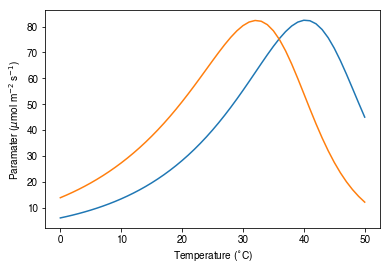

In [27]:
plt.plot(Tleaf-c.DEG_2_KELVIN, Vcmax)
plt.plot(Tleaf-c.DEG_2_KELVIN, Jmax)
plt.ylabel("Paramater ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^{\circ}$C)")

In the model both parameters are modelled using a peaked form of the Arrhenius equation. The Eav/Eaj parameters give the exponential increase of the function below the optimum; the Hdv/Hdj parameters describe the rate of decrease of the function above the optimum. 

**Q. Can you work out what parameter values you used?**

Answer:

In [28]:
print(p.Vcmax25, p.Eav, p.deltaSv, p.Hdv)
print(p.Jmax25, p.Eaj, p.deltaSj, p.Hdj)

40.0 51560.0 629.26 200000.0
66.8 43790.0 644.4338 200000.0


**Q. Can you now tweak these values and explore how the functions respond to temperature?**

Answer: 

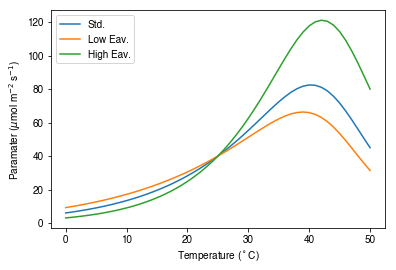

In [29]:
Vcmax2 = F.peaked_arrh(p.Vcmax25, 40000., Tleaf, p.deltaSv, p.Hdv)
Vcmax3 = F.peaked_arrh(p.Vcmax25, 70000., Tleaf, p.deltaSv, p.Hdv)

plt.plot(Tleaf-c.DEG_2_KELVIN, Vcmax, label="Std.")
plt.plot(Tleaf-c.DEG_2_KELVIN, Vcmax2, label="Low Eav.")
plt.plot(Tleaf-c.DEG_2_KELVIN, Vcmax3, label="High Eav.")
plt.legend(numpoints=1, loc="best")
plt.ylabel("Paramater ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^\circ$C)")
plt.show()

In the model, the Rubisco-limited photosynthesis rate is made up of five parameters: 

  1. $\Gamma$$^{*}$: the CO~2~ compensation point in the absence of mitochondrial respiration.
  2. V~cmax~: the maximum rate of Rubisco activity.
  3. R~d~: leaf mitochondrial respiration in the light (day respiration).
  4. K~o~: Michaelis– Menten coefficients for oxygenation.
  5. K~c~: Michaelis– Menten coefficients for carboxylation.
  
Each of these parameters is temperature dependent, thus the skill of the model depends on correctly accounting for these response to temperature when using the model. When we use these model parameters in global models we typical assume that the parameters (excluding V~cmax~) are conserved across species. This assumption is broadly supported by observations.

**Q. What do we think happens in different growing conditions?**

By contrast, leaf measurements suggest that V~cmax~ varies considerably: varying between leaves within a single plant, across growing seasons and across plants. In global models, we typically assume that we can represent this variability using 5-11 plant functional types, see @Rog14 for more details. Even when we do this in models, the disagreement across models is striking.

![](data/rogers.png)




**Q. What impact do you think this variability will have on model simulations of GPP?**

**Q. Now that you've seen how to call the functions to calculate V~cmax~ and J~max~, can you look in the code (python/farq.py) and also plot $\Gamma$$^{*}$, R~d~m, K~o~ and K~m~ as a function of temperature?**
  
***

# Response to temperature

**Q. From your new understanding of how the key model parameters change with temperature, can you predict how the rate of photosynthesis is likely to change with temperature?**

**Q. Can you make a plot to see if your prediction matched the models? (hint ... You will need to call the calc_photosynthesis function)**

Answer:

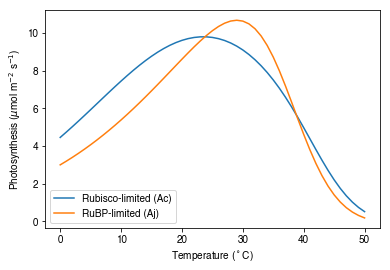

In [30]:
PAR = 1800.0
Cs = 400.0
vpd = 1.5

(An, Ac, Aj, gsw, Rd) = F.photosynthesis(p, Cs, Tleaf, PAR, vpd)

#plt.plot(Tleaf-c.DEG_2_KELVIN, An, label="An")
plt.plot(Tleaf-c.DEG_2_KELVIN, Ac-Rd, label="Rubisco-limited (Ac)")
plt.plot(Tleaf-c.DEG_2_KELVIN, Aj-Rd, label="RuBP-limited (Aj)")
plt.legend(numpoints=1, loc="best")
plt.ylabel("Photosynthesis ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^\circ$C)")
plt.show()